# Stock Expected excess return to Value-At-Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'AMD' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def ervar(stock_returns, market_returns, rf):
    m = np.matrix([stock_returns, market_returns])
    beta = np.cov(m)[0][1] / np.std(market_returns)
    alpha = np.mean(stock_returns) - beta * np.mean(market_returns)
    sorted_returns = np.sort(stock_returns)
    index = int(alpha * len(sorted_returns))
    mu = stock_returns.mean()
    erVaR = (mu - rf) / abs(stock_returns[index])
    return erVaR

Text(0, 0.5, 'Expected excess return to Value-at-risk')

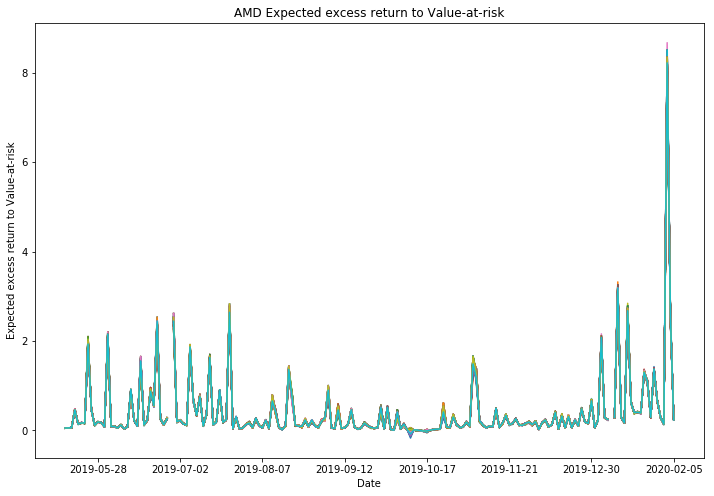

In [6]:
# Compute the running Expected excess return to Value-at-Risk
running = [ervar(stocks_returns[i-90:i], market_returns[i-90:i], rf[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Expected excess return to Value-at-Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol2 + ' Expected excess return to Value-at-risk')
plt.xlabel('Date')
plt.ylabel('Expected excess return to Value-at-risk')

In [7]:
stock_ervar = ervar(stocks_returns, market_returns, rf[-1])
stock_ervar

0.029803252695110107